# Time Series Analysis
## Fundamentals of Time Series Data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
# Loading the Data
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
# Convert 'year' and 'month' to a datetime object
flights['date'] = pd.to_datetime(flights['year'].astype(str) + flights['month'].astype(str), format='%Y%b')

In [4]:
flights.head()

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   date        144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


#### Plot the time series

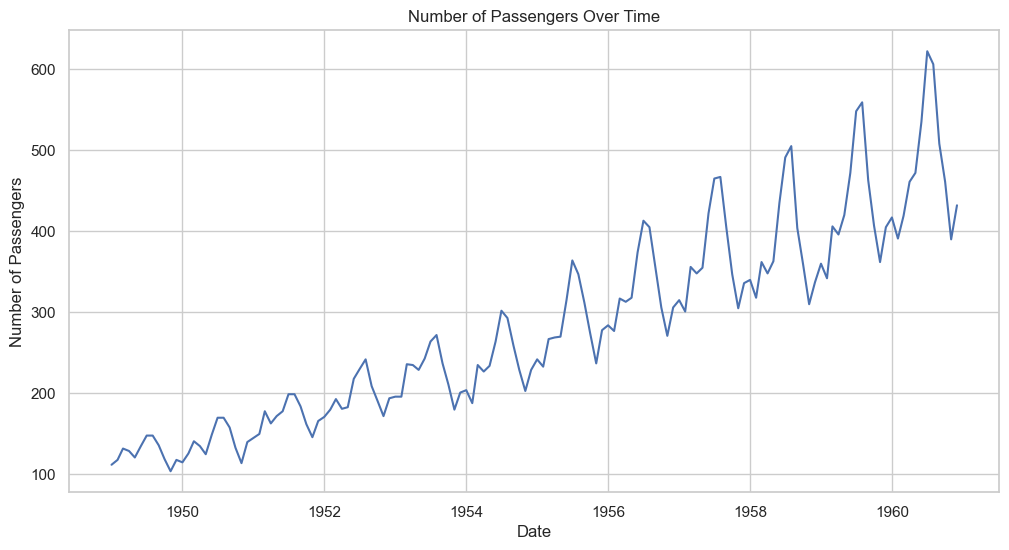

In [6]:
# Sort by date to ensure correct plotting
flights = flights.sort_values(by='date')
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x='date', y='passengers')
plt.title('Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

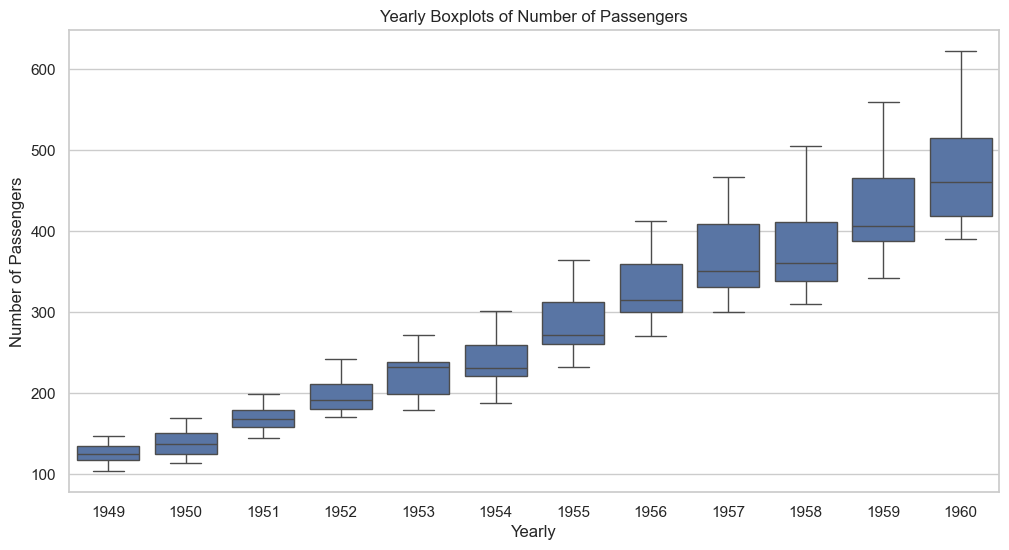

In [7]:
# Plot yearly boxplots for the number of passengers
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='passengers', data=flights)
plt.title('Yearly Boxplots of Number of Passengers')
plt.xlabel('Yearly')
plt.ylabel('Number of Passengers')
plt.show()

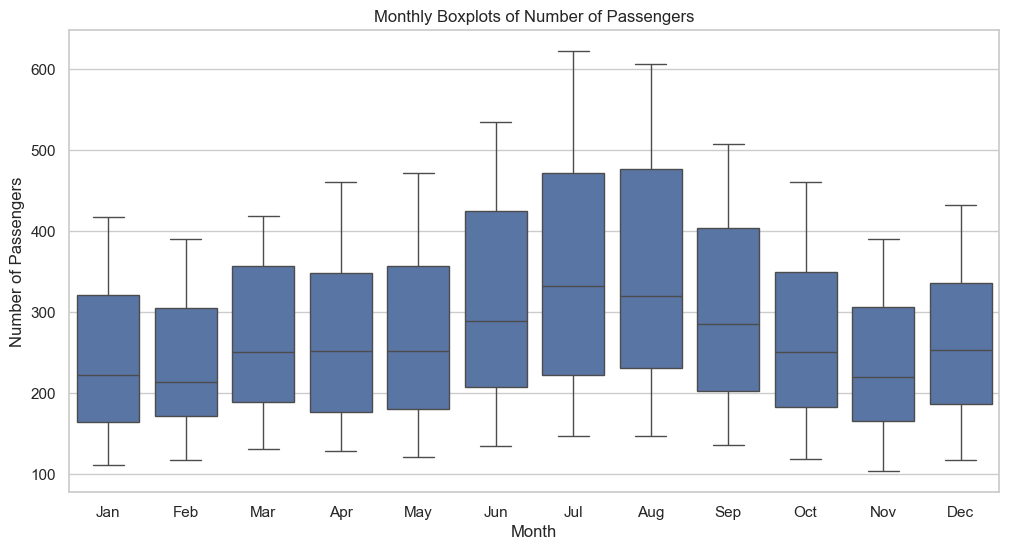

In [8]:
# Plot monthly boxplots for the number of passengers
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='passengers', data=flights)
plt.title('Monthly Boxplots of Number of Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()

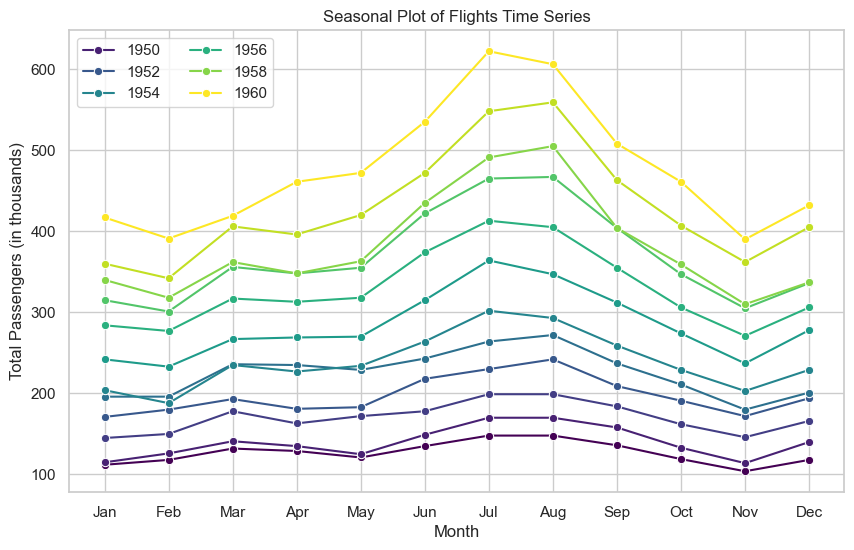

In [9]:
# Plotting the total number of passengers per month
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')
sns.lineplot(data=flights, x='month', y='passengers', marker='o', hue='year', palette="viridis")
plt.legend(loc='upper left', ncol=2)
plt.title('Seasonal Plot of Flights Time Series')
plt.xlabel('Month')
plt.ylabel('Total Passengers (in thousands)')
plt.show()

#### Decomposition in Trend, Seanonality and Error

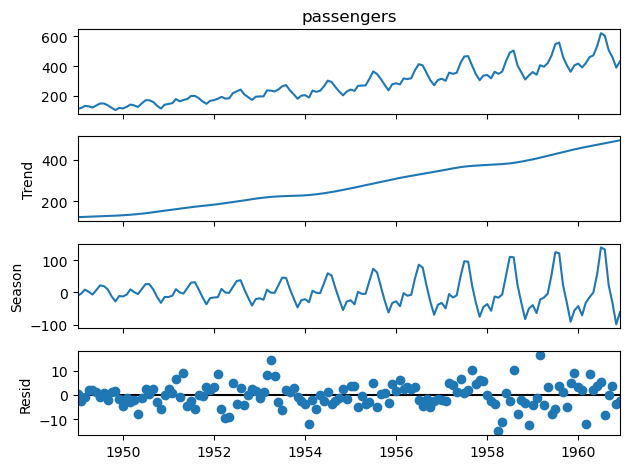

In [10]:
decomp = STL(flights.set_index('date').passengers, period=12).fit()
plt.rcdefaults() 
decomp.plot()
plt.show()


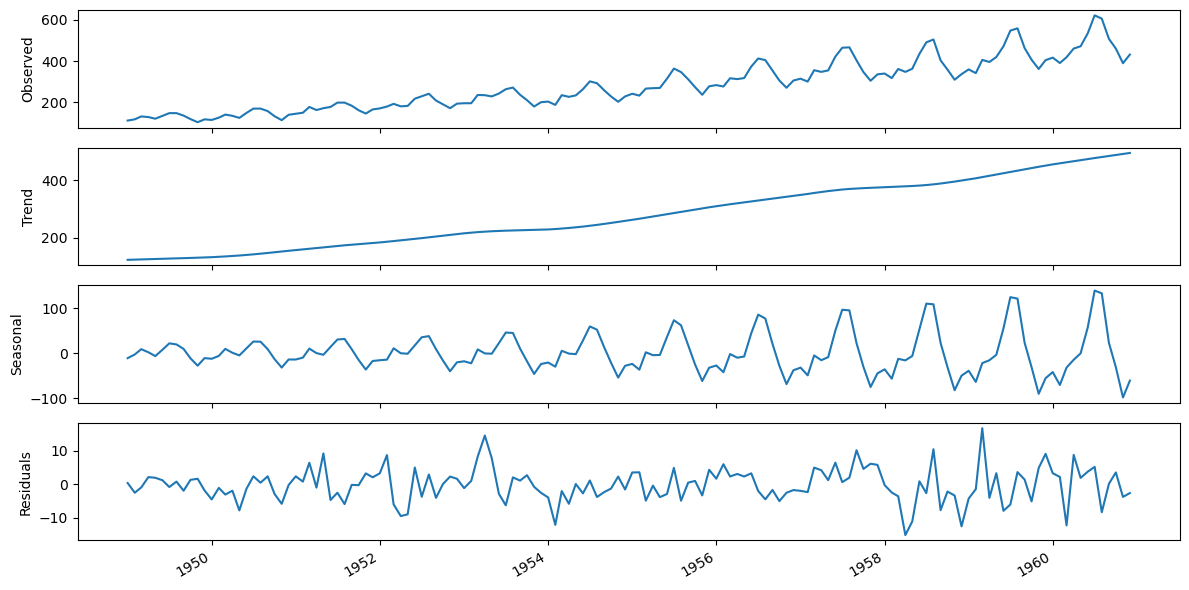

In [11]:
advanced_decomposition = STL(flights.set_index('date').passengers, period=12).fit()
plt.rcdefaults()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 6))

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

#### logarithmize the series for a constant variance

In [12]:
# logarithmize the number of passengers
flights['log_passengers'] = np.log(flights['passengers'])
flights.head()

,year,month,passengers,date,log_passengers
0,1949,Jan,112,1949-01-01,4.718499
1,1949,Feb,118,1949-02-01,4.770685
2,1949,Mar,132,1949-03-01,4.882802
3,1949,Apr,129,1949-04-01,4.859812
4,1949,May,121,1949-05-01,4.795791


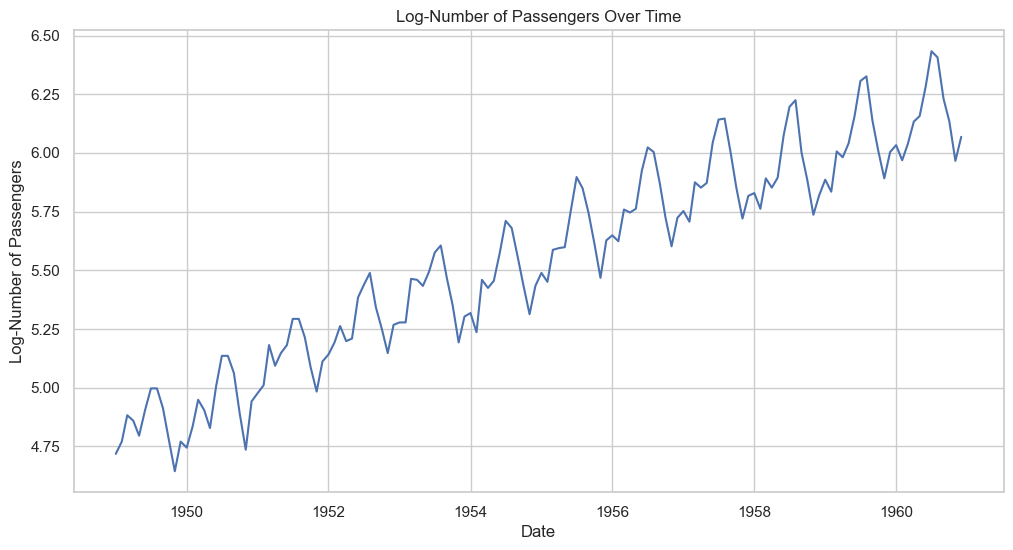

In [13]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x='date', y='log_passengers')
plt.title('Log-Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Log-Number of Passengers')
plt.show()

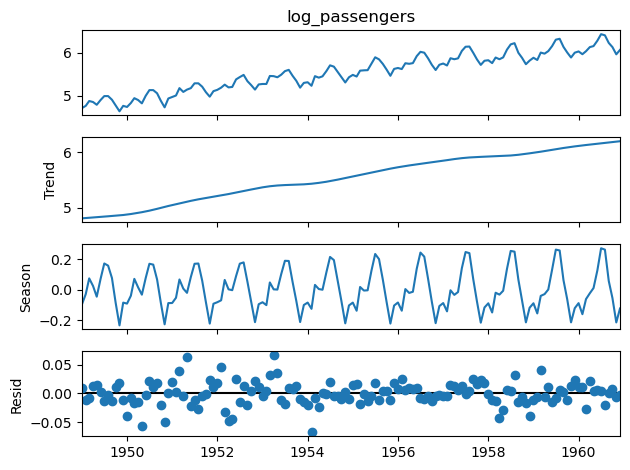

In [14]:
decomp = STL(flights.set_index('date').log_passengers, period=12).fit()
plt.rcdefaults() 
decomp.plot()
plt.show()

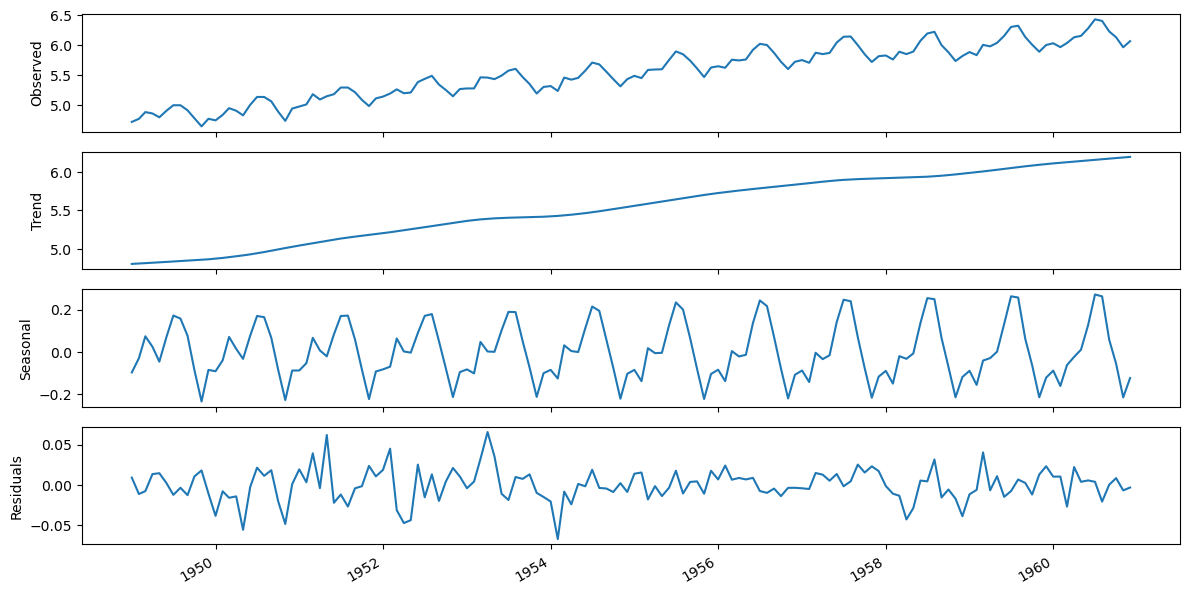

In [15]:
advanced_decomposition = STL(flights.set_index('date').log_passengers, period=12).fit()
plt.rcdefaults()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 6))

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()


#### Differencing to eliminate trend and seasonality

In [16]:
flights['log_passengers_diff_1'] = flights.log_passengers.diff()

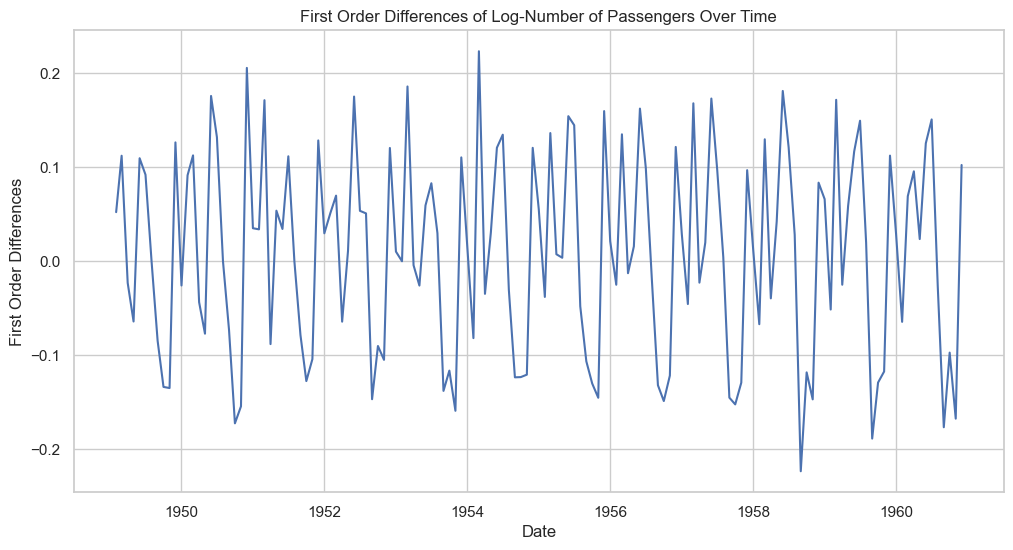

In [17]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x='date', y='log_passengers_diff_1')
plt.title('First Order Differences of Log-Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('First Order Differences')
plt.show()

Seasonal differencing

In [18]:
flights['log_passengers_diff_1_12'] = flights.log_passengers.diff(periods=12).diff()

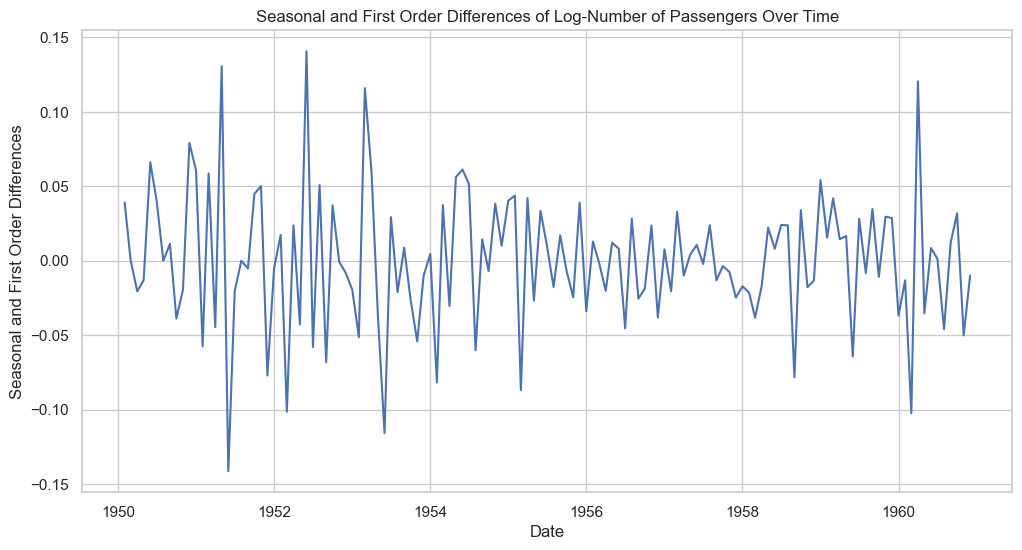

In [19]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x='date', y='log_passengers_diff_1_12')
plt.title('Seasonal and First Order Differences of Log-Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Seasonal and First Order Differences')
plt.show()

Decomposition of the resulting time series

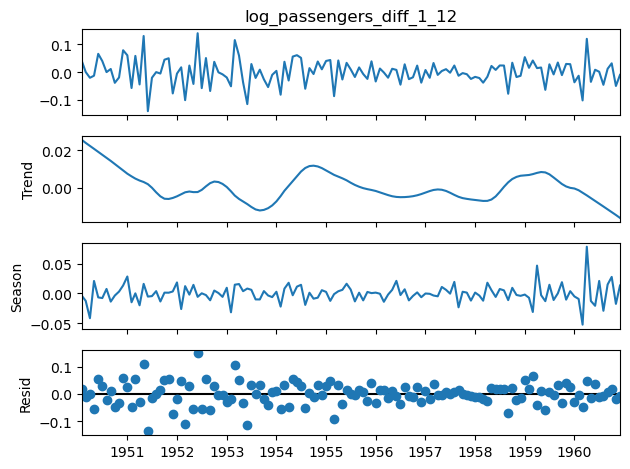

In [20]:
decomp = STL(flights.set_index('date').log_passengers_diff_1_12.dropna(), period=12).fit()
plt.rcdefaults() 
decomp.plot()
plt.show()

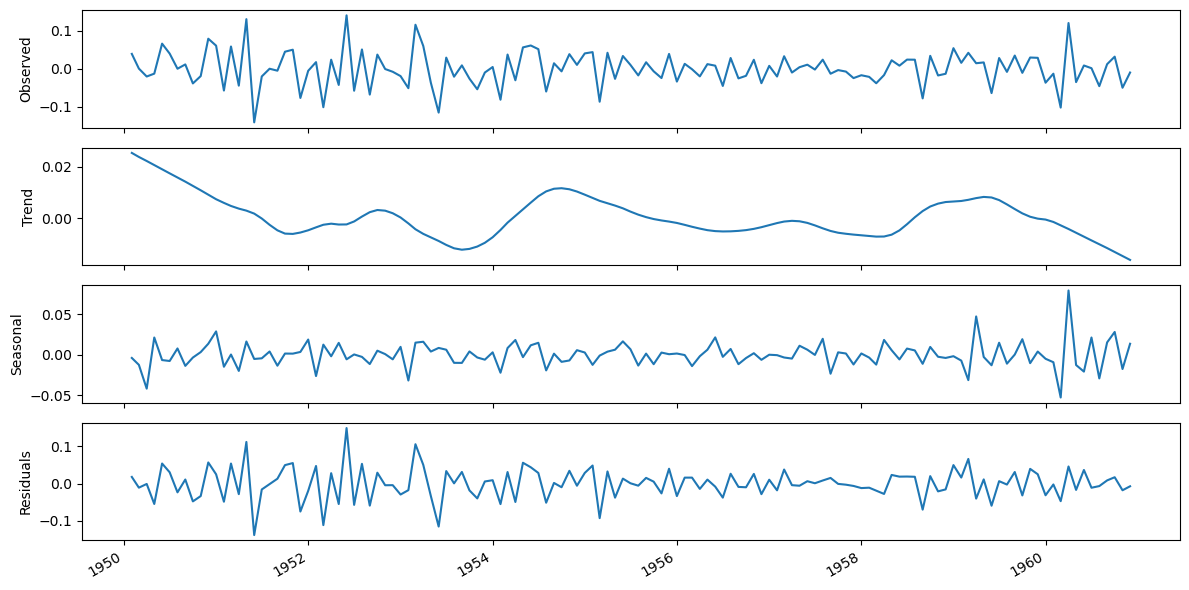

In [21]:
advanced_decomposition = STL(flights.set_index('date').log_passengers_diff_1_12.dropna(), period=12).fit()
plt.rcdefaults()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 6))

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

# ADF Test

In [22]:
adf_test = adfuller(flights.set_index('date').log_passengers_diff_1_12.dropna())
print(f'p-value: {adf_test[1]}')

p-value: 0.00024859123113838495


# ACF Plot

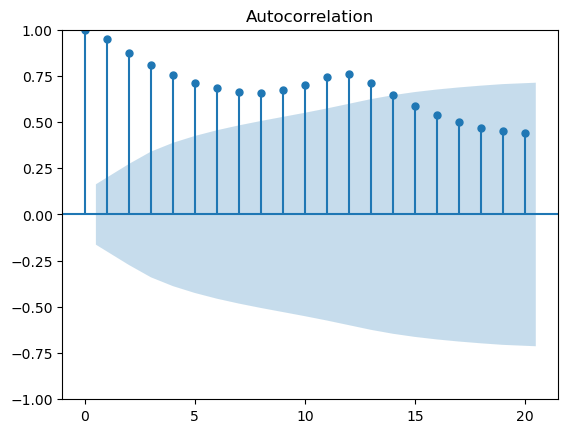

In [23]:
plot_acf(flights.passengers.dropna(), lags=20)
plt.show()

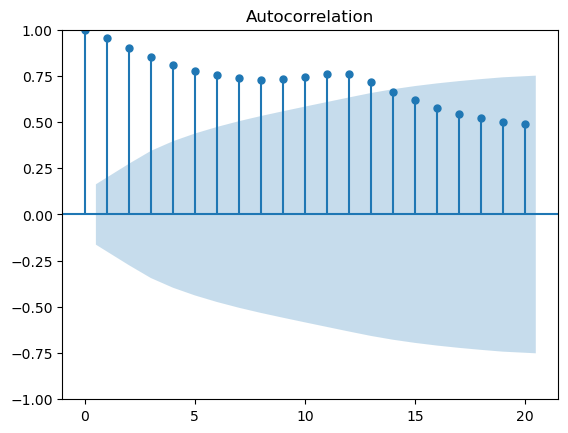

In [24]:
plot_acf(flights.log_passengers.dropna(), lags=20)
plt.show()

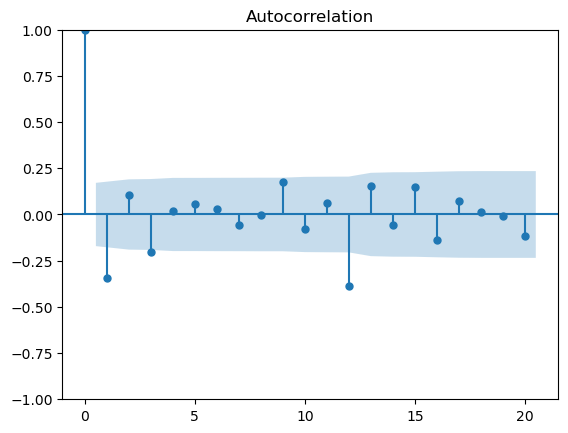

In [25]:
plot_acf(flights.log_passengers_diff_1_12.dropna(), lags=20)
plt.show()